<a href="https://colab.research.google.com/github/miluseel/MiluseelAI/blob/main/Chap6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chap 6-3. 주성분 분석

### 차원과 차원축소
- 차원 : 머신러닝에서 데이터가 가진 속성
- 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
  - 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원 가능
  - 주성분 분석 (PCA)

### 주성분 분석
: 데이터에 있는 분산이 큰 방향으로 찾는 것
  - 분산 : 데이터가 널리 퍼져있는 정도
  - 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듦
  - 첫번째 주성분 찾은 후 이 벡터에 수직이고 분선이 가장 큰 다음 방향 찾기 ( 두번째 주성분 )
  - 원본의 특성만큼 주성분을 찾을 수 있음



### PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-12-25 10:53:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-25 10:53:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-25 10:53:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
#주성분저장 : components_

print(pca.components_.shape)

#첫번째 차원 : 50 (n_components=50 설정)
#두번째 차원 : 10000 (항상 원본데이터와 특성 갯수와 같기 때문)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

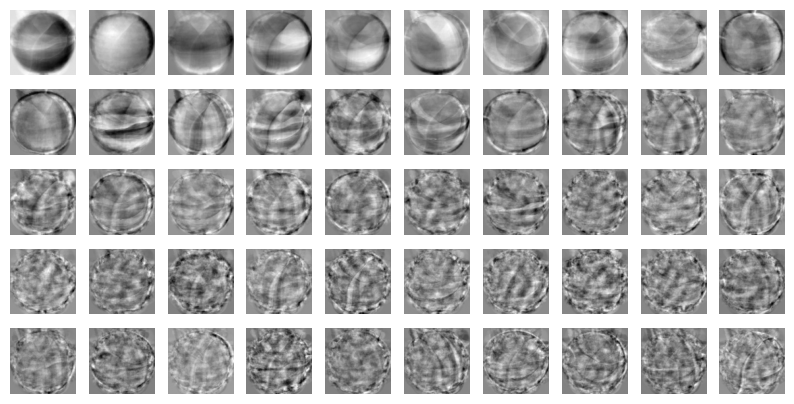

In [9]:
#주성분 그림으로 보기
draw_fruits(pca.components_.reshape(-1, 100, 100))

* transform() : 차원 축소

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
#50개의 특성을 가진 주성분으로 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


###  원본 데이터 재구성
- inverse_transform()메서드 : 차원복원

In [13]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


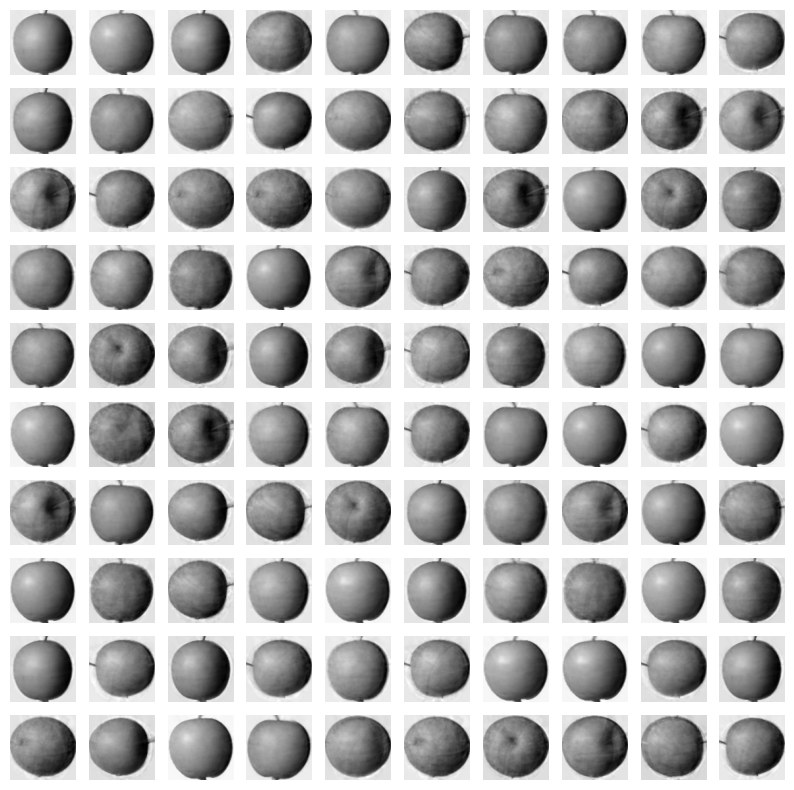

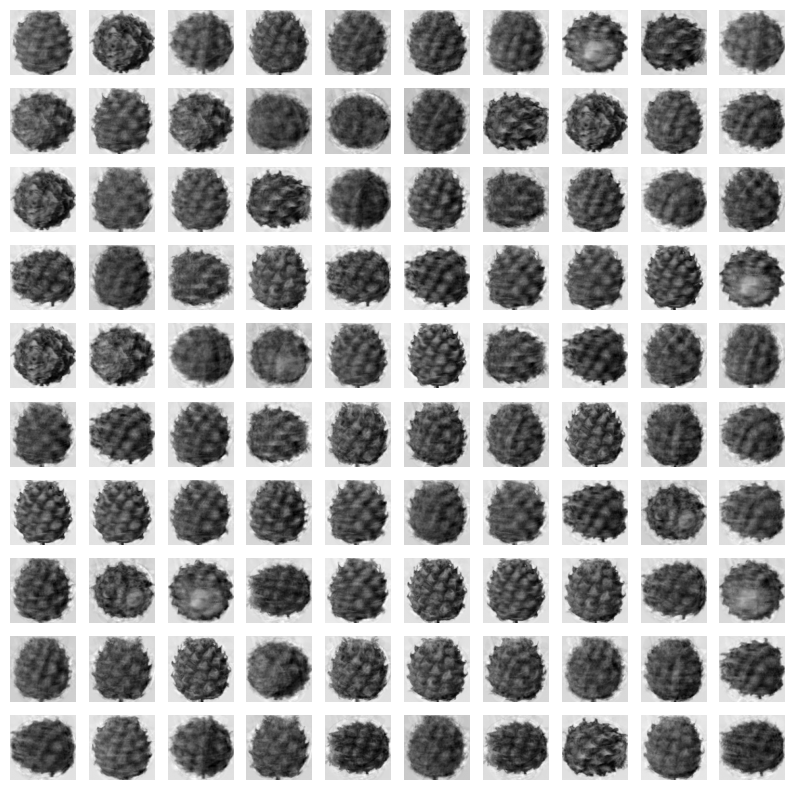

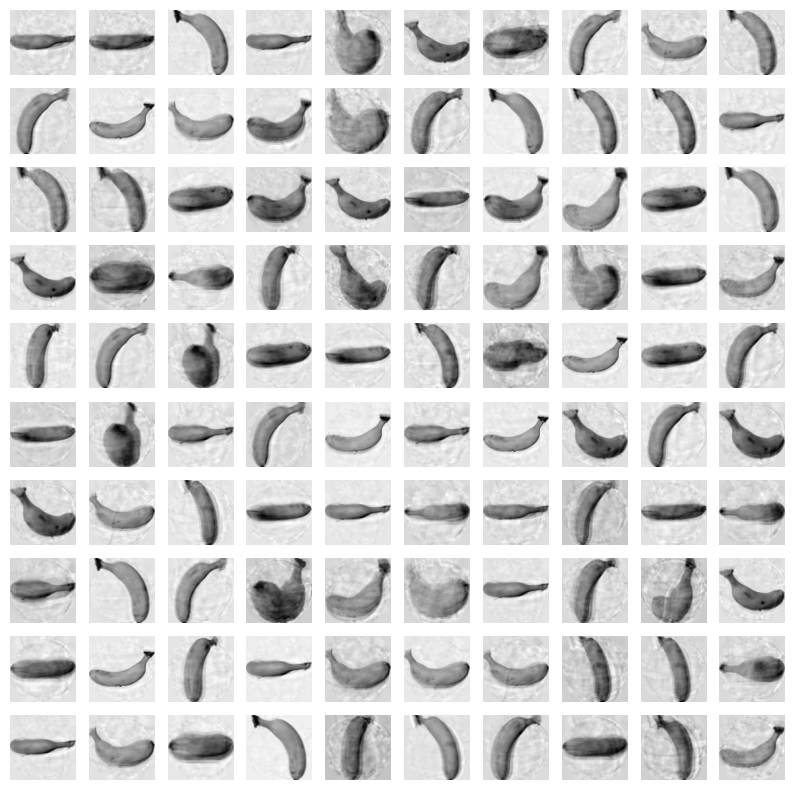

In [14]:
# 100*100크기로 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

### 설명된 분산
: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA클래스에 _explained_variance\_ratio_ : 주성분의 설명된 분산 비율 기록

In [15]:
print(np.sum(pca.explained_variance_ratio_))

#92%이상의 분산 유지함을 확인

0.9214697040052687


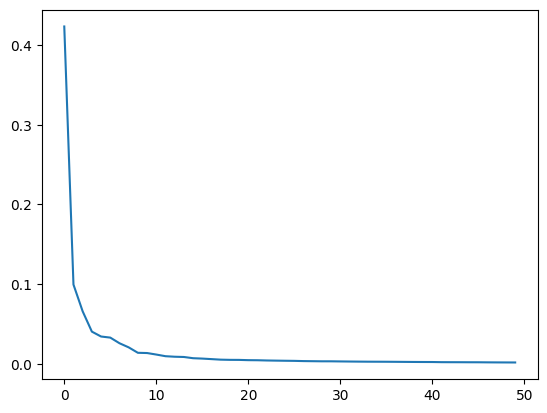

In [16]:
#분산 그래프로 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

#처음 10개의 주성분이 대부분의 분산을 표현함을 확인

### 다른 알고리즘과 함께 사용하기

1. 로지스틱 회귀모델과 함께 사용

In [18]:
#로지스틱 회귀모델과 함께 사용해보기

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
#지도학습을 위한 target설정
target = np.array([0]*100 + [1]*100 + [2]*100)

In [24]:
#교차검증
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#교차검증 점수는 높지만 과대적합된 모델 만들 가능성있음

0.9966666666666667
1.693058156967163


In [26]:
#pca로 축소한 값과 비교
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#정확도 동일, 훈련시간은 감소

0.9966666666666667
0.01568326950073242


In [28]:
#분산 50%의 주성분을 찾도록 설정
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [30]:
#주성분 갯수 확인
print(pca.n_components_)

#2개로 50%표현가능함을 확인

2


In [31]:
#원본 데이터로 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [33]:
#교차검증 결과 확인

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#결과 값 (+)
#로지스틱 회귀가 max_iter안에 최적해에 완전히 도달하지 못함 - 결과값이 좋기 때문에 괜찮음

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.99
0.240720796585083


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

2. k-평균 알고리즘으로 클러스터 찾아보기

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


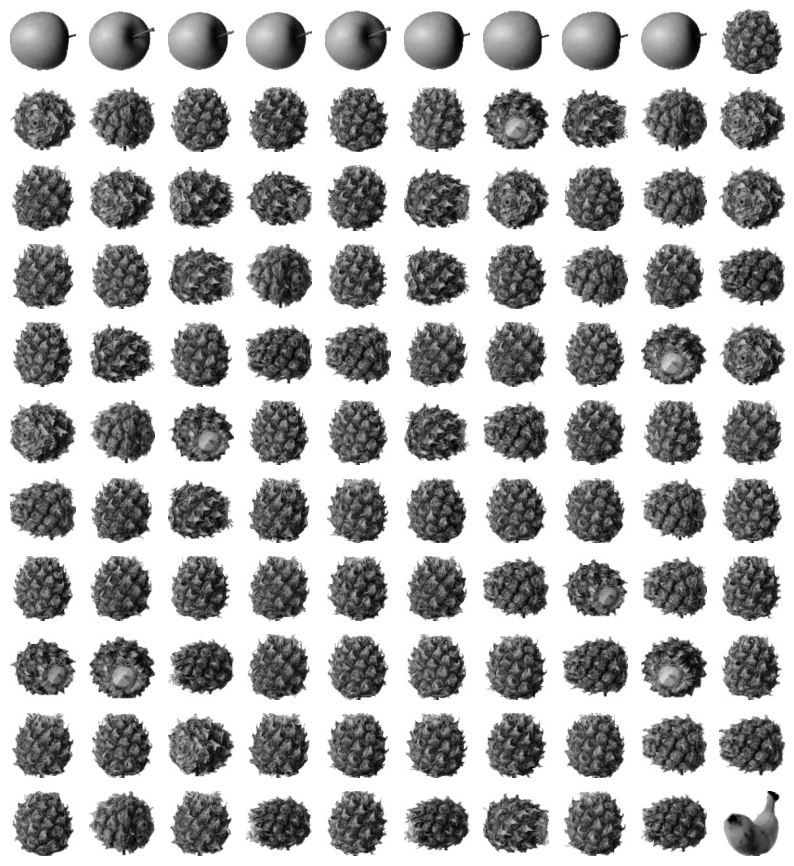

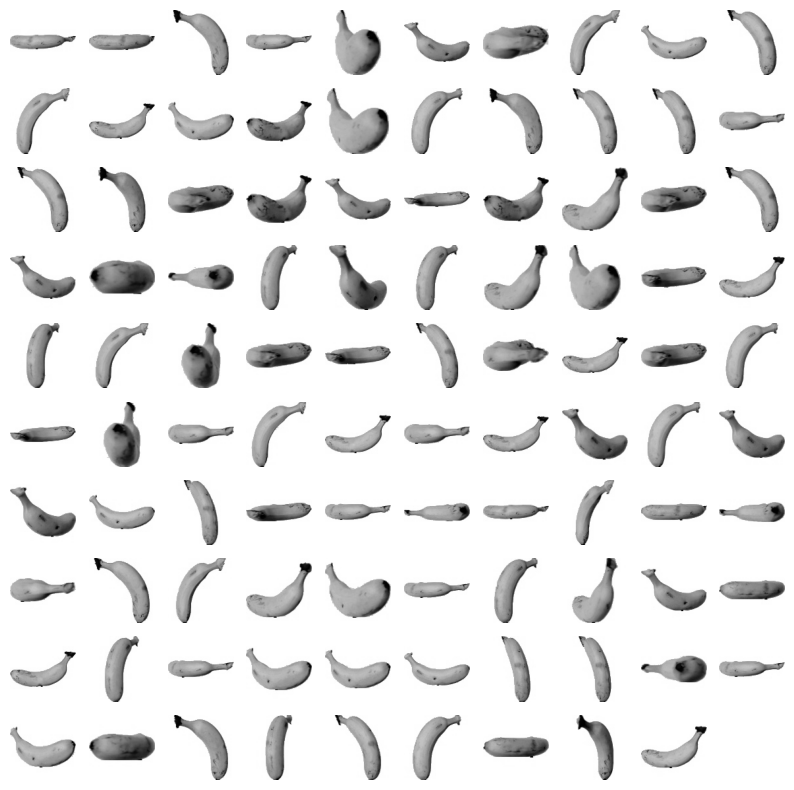

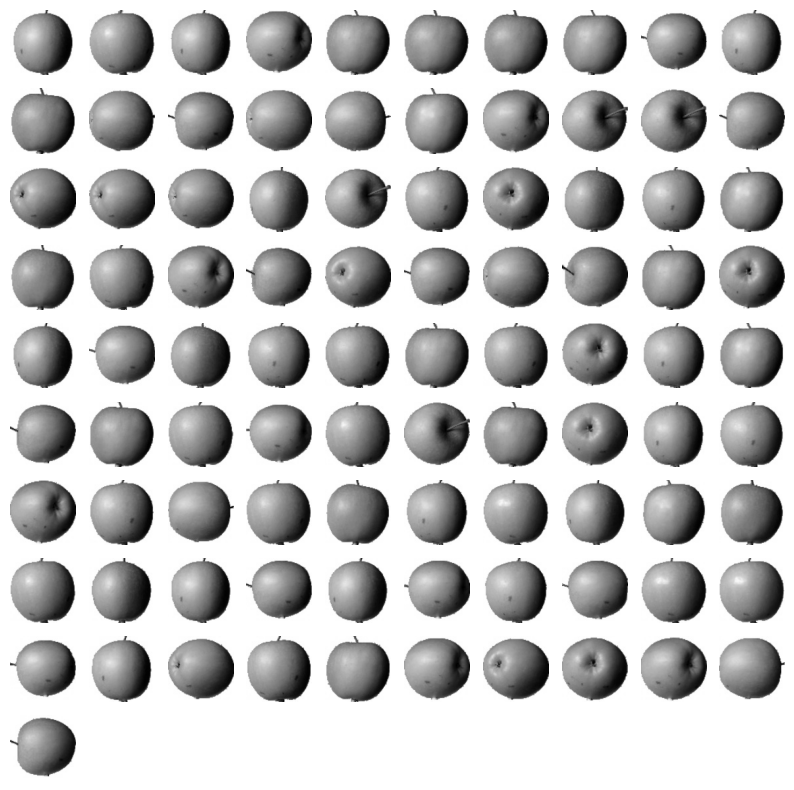

In [35]:
#이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

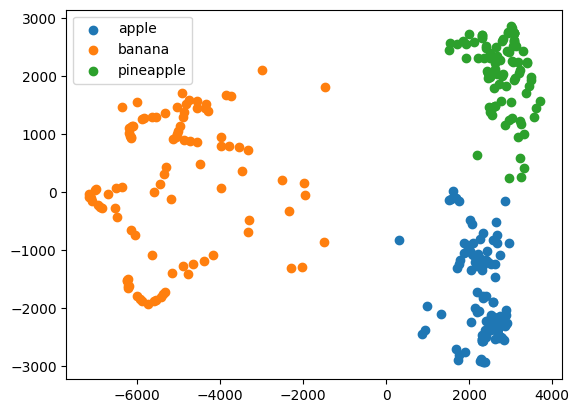

In [37]:
# km.lables_를 사용하여 클러스터별로 산점도 그리기

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()